In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [2]:
import os
os.listdir("../input/movie-review-sentiment-analysis-kernels-only/")

['sampleSubmission.csv', 'test.tsv.zip', 'train.tsv.zip']

In [3]:
train = pd.read_csv('../input/movie-review-sentiment-analysis-kernels-only/train.tsv.zip', sep="\t")
test = pd.read_csv('../input/movie-review-sentiment-analysis-kernels-only/test.tsv.zip', sep="\t")

# train = pd.read_csv("train.tsv.zip", compression='zip', index_col='PhraseId')
# test = pd.read_csv("test.tsv.zip", compression='zip', index_col ='PhraseId')

In [4]:
train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [5]:
print(len(train['SentenceId'].unique()))
print(len(train['Phrase'].unique()))

8529
156060


In [6]:
print(len(test['SentenceId'].unique()))
print(len(test['Phrase'].unique()))

3310
66292


In [7]:
train.loc[train.SentenceId == 1]

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
58,59,1,much,2
59,60,1,of a story,2
60,61,1,a story,2
61,62,1,story,2


In [8]:
train.loc[train.SentenceId == 1][train.Sentiment != 2]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
21,22,1,good for the goose,3
22,23,1,good,3
33,34,1,"the gander , some of which occasionally amuses...",1
46,47,1,amuses,3
47,48,1,but none of which amounts to much of a story,1
49,50,1,none of which amounts to much of a story,1


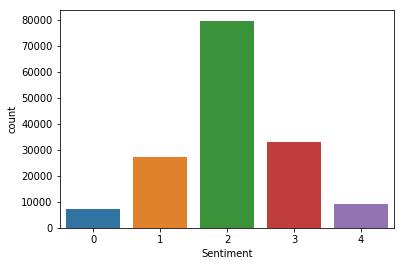

In [9]:
# plt.hist(train['Sentiment'])
sns.countplot(train['Sentiment'])

In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [11]:
def clean_text(words):
    review_corpus = []
    for i in range(0,len(words)):
        review = str(words[i])
        stop_words = set(stopwords.words('english'))
#          review  = [w for w in review if not w in stop_words]
        porter = PorterStemmer()
        review = [porter.stem(w) for w in word_tokenize(review.lower()) if w.isalpha() and not w in stop_words]
#         review = [porter.stem(word) for word in review]
        review = ' '.join(review)
#         review=' '.join([porter.stem(word) for word in review])
        review_corpus.append(review)
    return review_corpus
#     return review
#         word = word_tokenize(w)
#     return word    

In [12]:
train['clean_review']=clean_text(train.Phrase.values)
test['clean_review'] = clean_text(test.Phrase.values)

In [13]:
text_pos = train['clean_review'].loc[train.Sentiment == 4]

In [14]:
text_neg = train['clean_review'].loc[train.Sentiment == 0]

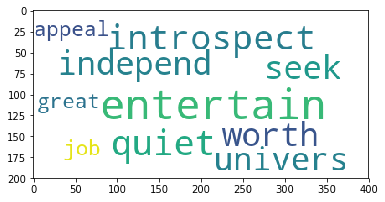

In [15]:
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(str(text_pos))
plt.imshow(wordcloud)

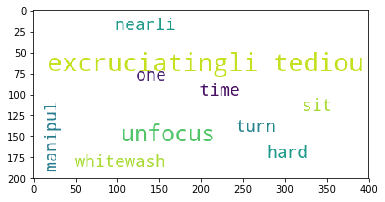

In [16]:
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(str(text_neg))
plt.imshow(wordcloud)

In [17]:


vectorizer = CountVectorizer()
vectorizer.fit(text_pos)
p = list(vectorizer.vocabulary_)
print(p[0:10])

vectorizer.fit(text_neg)
n = list(vectorizer.vocabulary_)
print(n[0:10])


['quiet', 'introspect', 'entertain', 'independ', 'worth', 'seek', 'posit', 'thrill', 'combin', 'ethnographi']
['would', 'hard', 'time', 'sit', 'one', 'aggress', 'manipul', 'whitewash', 'troubl', 'everi']


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [19]:

final = train['clean_review']
target = train['Sentiment']

final_test = test['clean_review']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
vectorizer = CountVectorizer(ngram_range = (1,2))
# vectorizer = TfidfVectorizer()
vectorizer.fit(final.values)
vector_final = vectorizer.transform(final.values)
# vector_target = vectorizer.transform(target.values)

vector_test = vectorizer.transform(final_test.values)

In [21]:
lr = LogisticRegression(penalty='l2', max_iter=1000)
lr.fit(vector_final, target)
predictions = lr.predict(vector_test)

# clf = MultinomialNB()
# clf.fit(vector_final, target)
# predictions = clf.predict(vector_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [22]:
samplesub = pd.read_csv('../input/movie-review-sentiment-analysis-kernels-only/sampleSubmission.csv')

output = pd.DataFrame({'PhraseId': samplesub.PhraseId, 'Sentiment': predictions})
output.to_csv('submission.csv', index=False)